# Boston Airbnb Exploratory Data Analysis


**Team 1**:
Cooper  Redpath, Dan Liu, Marielis Rosario Hernandez, Ming Zou, Subhanshu Pandey

**Context:**
Using listing data from Airbnb, we will analyze the major factors that impact owning an AirBnb in Boston and understanding how the apartments are priced. 


**Problem:**
As an owner of AirBnb, how can you price a rental property in the Greater Boston area based on comparative rentals, location, amenities and other attributes?


**Assignment Description: **
The descriptive and prescriptive analyses below provide a basic review of a few key factors that may contribute to identifying potential solutions to the problem above. 

**Data Source**: Airbnb Boston Public Data

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
sns.set(style="white")
listings = pd.read_csv('https://raw.githubusercontent.com/marielisrosario/IS833-Project/master/listings.csv')
listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,2.020000e+13,9/7/2016,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,2.020000e+13,9/7/2016,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,2.020000e+13,9/7/2016,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47


**Dataset Summary**

3585 listings in total with 95  different attributes. From the dataset we are trying to focus on the price of listings based on a variety of factors including locations, hosts, reviews and types of accomodations, so we rebuilt a dataframe from selected columns. The reason why we dropped some of the qualitative data is because they are not as useful as the quantitative ones that we are using for our data analysis. The dataset was from 2016.

In [0]:
listings = listings[['price', 'accommodates', 'bedrooms', 'bathrooms', 'neighbourhood_cleansed','host_response_rate', 'host_acceptance_rate', 
                     'host_is_superhost', 'review_scores_rating','cancellation_policy', 'property_type', 'room_type']]

In [0]:
listings.head()

,price,accommodates,bedrooms,bathrooms,neighbourhood_cleansed,host_response_rate,host_acceptance_rate,host_is_superhost,review_scores_rating,cancellation_policy,property_type,room_type
0,250,4,2.0,1.5,Roslindale,NaN,NaN,f,NaN,moderate,House,Entire home/apt
1,65,2,1.0,1.0,Roslindale,1.0,1.00,f,94.0,moderate,Apartment,Private room
2,65,2,1.0,1.0,Roslindale,1.0,0.88,t,98.0,moderate,Apartment,Private room
3,75,4,1.0,1.0,Roslindale,1.0,0.50,f,100.0,moderate,House,Private room
4,79,2,1.0,1.5,Roslindale,1.0,1.00,t,99.0,flexible,House,Private room


We noticed that there are a few N/As in some of the columns that we are focusing on, so we filled them with default values, given our understanding of the property attributes.

In [0]:
listings["bedrooms"].fillna(listings["bedrooms"]==0, inplace=True)
listings["bathrooms"].fillna(listings["bathrooms"]==1, inplace=True)

# Average Airbnb Cost

The average Airbnb price in Boston area is $173.93 per night.

In [0]:
avg_price = listings['price'].mean()
print('Average price in Boston is: $', round(avg_price,2))

Average price in Boston is: $ 173.93


# Airbnb Price Distribution

The most expensive Airbnb property in Boston can cost more than \\$4000 per night. However, as calculated above, the average Airbnb price is around $173.93\. And majority of property prices are concentrated around the average price level, as evidence shown in the box plot below.

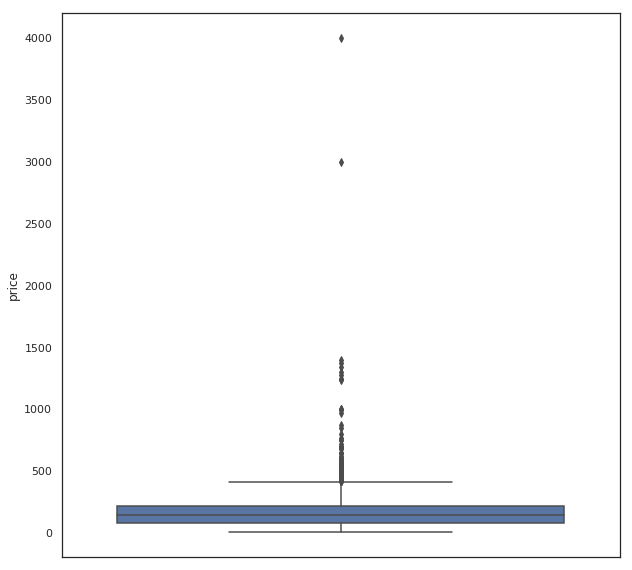

In [0]:
plt.figure(figsize=(10,10))
sns.boxplot(y="price", data=listings)

# Distribution of Airbnb Prices by Neighbourhood

After breaking down the data by different neighbourhoods, we can tell "Fenway" and "South Boston Waterfront" have the most expensive Airbnb properties in the market. And "Mattapan" seems to have the cheapest Airbnb price on average.

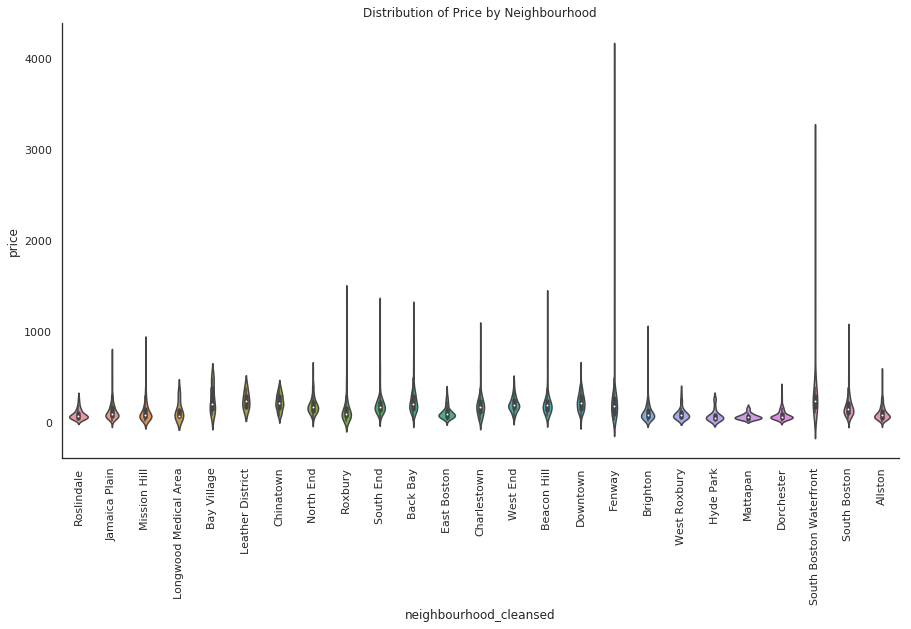

In [0]:
plt.figure(figsize=(15,8))
sns.violinplot(x="neighbourhood_cleansed", y="price", data=listings)
plt.xticks(rotation=90)
plt.title("Distribution of Price by Neighbourhood")
sns.despine()

# Different Bedrooms & Bathrooms Combination

The pivot table below is showing average prices of different combination of bedrooms & bathrooms. The maximum amount of bedrooms an Airbnb property has is 5. And you can find an property with 6 bathrooms at most. "3Bed+3.5Bath" seems to be the most expensive property type. 

In [0]:
listings.pivot_table(values='price', index='bedrooms', columns = 'bathrooms', aggfunc='mean')

bathrooms,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,6.0
bedrooms,,,,,,,,,,,,
0.0,60.00,NaN,155.925170,200.000000,NaN,NaN,NaN,450.000000,NaN,NaN,NaN,NaN
1.0,130.92,56.714286,142.384578,98.515385,99.984733,86.516129,97.857143,77.500000,NaN,NaN,106.25,163.0
2.0,349.00,NaN,221.516667,266.407407,299.840909,406.000000,NaN,NaN,NaN,NaN,399.00,NaN
3.0,NaN,NaN,236.818182,304.000000,331.142857,380.857143,492.600000,683.333333,NaN,NaN,NaN,NaN
4.0,NaN,NaN,282.400000,279.333333,384.666667,465.000000,375.000000,475.000000,412.5,NaN,NaN,NaN
5.0,NaN,NaN,100.000000,466.666667,310.166667,322.500000,554.000000,450.000000,NaN,1300.0,NaN,NaN


# Average Airbnb Prices in Different Neighbourhoods

The pivot table below is showing the average Airbnb prices in different neighbourhoods based on how many people a property can host. For example, if a group of 4 people is looking for an Airbnb in Allston, they can use the $155.49 average price as their reference. The maximum amount people an Airbnb property can host in Boston area is 16, and it's located in Roslindale.

In [0]:
listings.pivot_table(values='price', columns='accommodates', index = 'neighbourhood_cleansed', aggfunc='mean')

accommodates,1,2,3,4,5,6,7,8,9,10,11,12,14,16
neighbourhood_cleansed,,,,,,,,,,,,,,
Allston,58.297872,87.978261,133.466667,155.485714,243.857143,252.000000,266.333333,439.500000,459.000000,259.00,NaN,NaN,NaN,NaN
Back Bay,104.266667,191.210526,212.319149,289.776119,324.382353,379.388889,367.000000,228.333333,NaN,NaN,NaN,NaN,NaN,NaN
Bay Village,NaN,138.428571,219.666667,287.555556,500.000000,188.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Beacon Hill,128.222222,183.835052,238.074074,281.156250,297.500000,308.555556,622.250000,423.200000,NaN,NaN,NaN,NaN,NaN,NaN
Brighton,100.083333,87.252874,135.100000,145.444444,155.250000,204.461538,NaN,250.000000,NaN,500.00,400.0,450.000000,NaN,NaN
Charlestown,116.076923,141.775000,228.125000,212.681818,314.500000,309.916667,326.000000,382.666667,NaN,NaN,NaN,NaN,NaN,NaN
Chinatown,100.000000,194.100000,206.956522,246.687500,281.400000,275.500000,119.000000,379.000000,NaN,NaN,NaN,NaN,NaN,NaN
Dorchester,54.561644,79.186916,81.782609,130.393939,116.000000,184.705882,199.000000,262.500000,199.666667,225.00,NaN,NaN,395.0,NaN
Downtown,163.166667,225.000000,196.387097,278.370370,177.222222,337.272727,234.600000,158.000000,NaN,350.00,NaN,NaN,NaN,NaN


# Price vs. Accommodates

Based on the regression line in the scatter plot below, the more people an Airbnb property can host, the more it would cost per night.

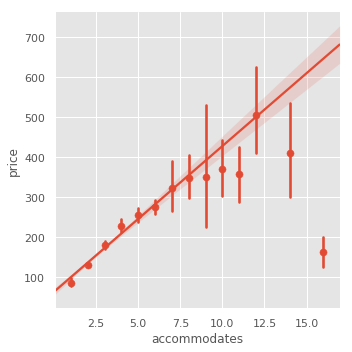

In [0]:
%matplotlib inline
plt.style.use('ggplot')
sns.lmplot(x="accommodates", y="price", data=listings, x_estimator=np.mean)

#  Price vs. Review Score Rating

Majority of Airbnb properties have review score above 80. The variance in prices grows as the score increases.

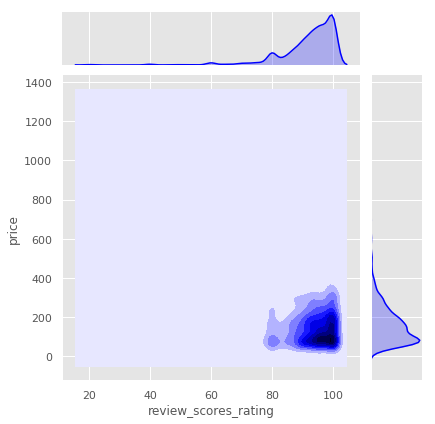

In [0]:
sns.jointplot(x="review_scores_rating", y="price", data=listings, 
              kind="kde", color="blue")


# Price vs. Host Response/Acceptance Rate

Two scatter plots below are showing the price distribution based on host's response/acceptance rate. Blue dots are used to represent Airbnb Super Hosts. As we can see, majority of Super Hosts tend to have 100% response/acceptance rate. Most of Airbnb property owners have been very responsive (above 90%). However, there is no strong correlation between price and host response/acceptance rate.

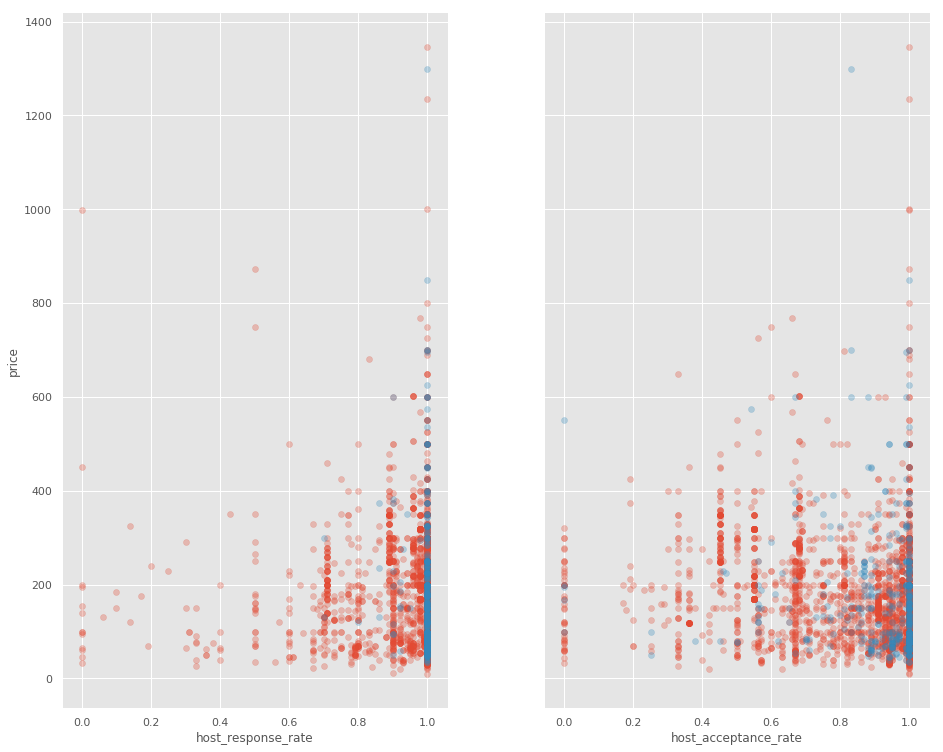

In [0]:
g = sns.PairGrid(listings, y_vars=["price"], x_vars=["host_response_rate", "host_acceptance_rate"], hue="host_is_superhost", aspect=1.1)
g.fig.set_size_inches(15,15)
ax = g.map(plt.scatter, alpha=0.3)

# Price vs. Cancellation Policy

According to the bar chart below, more expensive properties tend to have more strict cancellation policy, which could be interpretated as a way that Airbnb hosts are using to reduce risks.

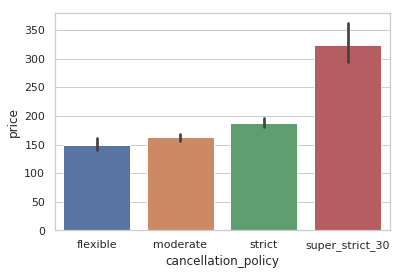

In [0]:
sns.set(style="whitegrid")
ax = sns.barplot(x="cancellation_policy", y="price", data=listings, order = ['flexible', 'moderate', 'strict', 'super_strict_30'])

# Price vs. Property Type

There are 13 different types of Airbnb properties in the Boston area. Guesthouse is the most expensive one on average. Camper/RV is the most affordable type.

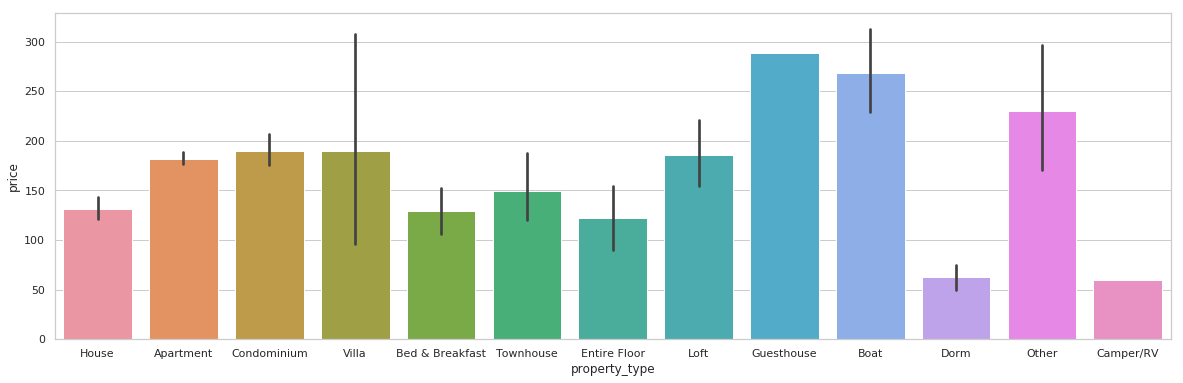

In [0]:
plt.figure(figsize=(20,6))
sns.set(style="whitegrid")
ax = sns.barplot(x="property_type", y="price", data=listings)


# Price vs. Room Type

Not surprisingly, if you would like to rent an entire place, you will need to pay more for the extra privacy. "Entire home/apt" is more than twice more expensive than "Private room" and "Shared room".

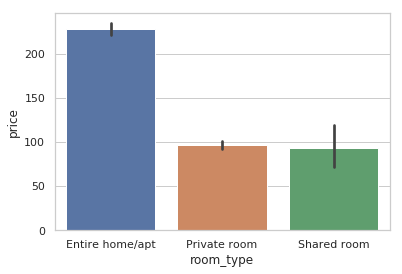

In [0]:
sns.set(style="whitegrid")
ax = sns.barplot(x="room_type", y="price", data=listings)

# Correlation Heat Map

In order to understand the relationships between some key variables that may be drivers of price.

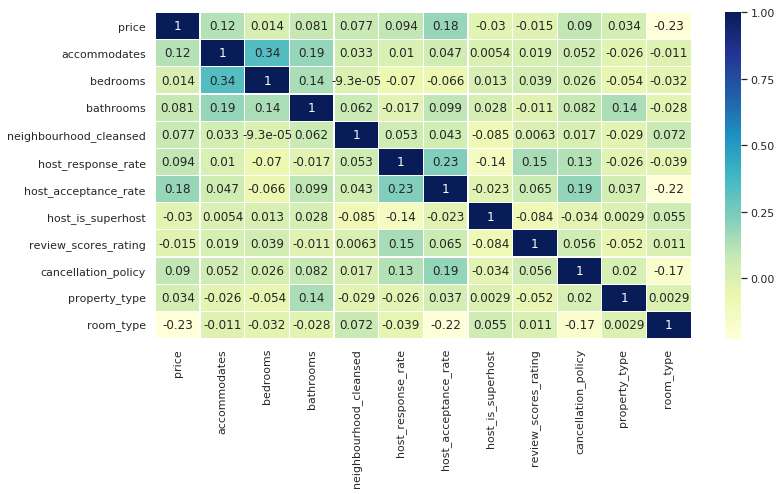

In [0]:
plt.figure(figsize=(12, 6))
listings_corr = listings[['price', 'accommodates', 'bedrooms', 'bathrooms', 'neighbourhood_cleansed','host_response_rate', 
                          'host_acceptance_rate', 'host_is_superhost', 'review_scores_rating','cancellation_policy', 'property_type', 'room_type']]
corr = listings_corr.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, linewidths=.2, cmap="YlGnBu", annot=True)

# Regression Model

## Data Clean Up

We thought to find out how many values are null values in each category. It turned out that there are 471 records that do not have anything stored as "host_response_rate" and "host_acceptance_rate". Moreover, there are 871 records that do not have any value in "review_score_rating".

In [0]:
listings.isnull().sum()

price                       0
accommodates                0
bedrooms                    0
bathrooms                   0
neighbourhood_cleansed      0
host_response_rate        471
host_acceptance_rate      471
host_is_superhost           0
review_scores_rating      813
cancellation_policy         0
property_type               3
room_type                   0
dtype: int64

We thought to drop "host _response_rate" and "host_acceptance_rate" from our data. Based on coorelaion heat map, these attributes were not strongly correlated with "price" and hence have little impact on price.

In [0]:
listings.drop(['host_response_rate', 'host_acceptance_rate'], axis=1, inplace=True)

We then converted our categorical variables into dummies so that we could use them to run a regression model.

In [0]:
listings = pd.get_dummies(listings, columns=['neighbourhood_cleansed', 'host_is_superhost', 
                                     'cancellation_policy', 'property_type', 'room_type'])

In [0]:
listings.drop(['neighbourhood_cleansed_Roslindale', 'host_is_superhost_f', 
               'cancellation_policy_moderate','property_type_Apartment', 'room_type_Private room'], axis=1, inplace=True)

Next step in our process is to convert data type of values stored in "bedrooms" and "bathrooms" categories from float to integer.

In [0]:
listings['bedrooms']=listings['bedrooms'].astype(int)
listings['bathrooms']=listings['bathrooms'].astype(int)

Now, we filtered out the records which are not having any "review_score_ratings" and store the output in to new data frame "listings_1". Filling nulls in "review_score_ratings" with any value such as 0 could have distorted regression results as we cannot really say which property should have what rating.

In [0]:
listings_1=listings[listings.review_scores_rating.notnull()]

Finnally, here is our new dataframe "listings_1"

In [0]:
listings_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 1 to 3583
Data columns (total 47 columns):
price                                             2772 non-null int64
accommodates                                      2772 non-null int64
bedrooms                                          2772 non-null int64
bathrooms                                         2772 non-null int64
review_scores_rating                              2772 non-null float64
neighbourhood_cleansed_Allston                    2772 non-null uint8
neighbourhood_cleansed_Back Bay                   2772 non-null uint8
neighbourhood_cleansed_Bay Village                2772 non-null uint8
neighbourhood_cleansed_Beacon Hill                2772 non-null uint8
neighbourhood_cleansed_Brighton                   2772 non-null uint8
neighbourhood_cleansed_Charlestown                2772 non-null uint8
neighbourhood_cleansed_Chinatown                  2772 non-null uint8
neighbourhood_cleansed_Dorchester                 2

## Linear Regression

Lets run the linear regression model. First, we defined our X and y variables.

In [0]:
X = listings_1.drop(['price'], axis=1)
X.shape

(2772, 46)

In [0]:
y = listings_1['price']
y.shape

(2772,)

Lets divide the data into training and test subsets.

In [0]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=833)

Instantiating the model by using LinearRegression()  from sklearn

In [0]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

Training our model, i.e., providing ML algorithm with training data to learn from

In [0]:
pd.DataFrame?


In [0]:
model.fit(Xtrain, ytrain)
col_1 = ['Features', 'Coefficients']
listings_1_features = ['accommodates', 'bedrooms', 'bathrooms', 'review_scores_rating',
        'neighbourhood_cleansed_Allston',	'neighbourhood_cleansed_Back Bay',	
        'neighbourhood_cleansed_Bay Village',	'neighbourhood_cleansed_Beacon Hill',	'neighbourhood_cleansed_Brighton',	
        'neighbourhood_cleansed_Charlestown', 'neighbourhood_cleansed_Chinatown', 'neighbourhood_cleansed_Dorchester',
        'neighbourhood_cleansed_Downtown', 'neighbourhood_cleansed_East Boston', 'neighbourhood_cleansed_Fenway',
        'neighbourhood_cleansed_Hyde Park', 'neighbourhood_cleansed_Jamaica Plain', 'neighbourhood_cleansed_Leather District',
        'neighbourhood_cleansed_Longwood Medical Area', 'neighbourhood_cleansed_Mattapan', 'neighbourhood_cleansed_Mission Hill',
        'neighbourhood_cleansed_North End', 'neighbourhood_cleansed_Roxbury', 'neighbourhood_cleansed_South Boston', 
        'neighbourhood_cleansed_South Boston Waterfront', 'neighbourhood_cleansed_South End', 'neighbourhood_cleansed_West End', 
        'neighbourhood_cleansed_West Roxbury', 'host_is_superhost_t', 'cancellation_policy_flexible', 'cancellation_policy_strict', 'cancellation_policy_super_strict_30',
        'property_type_Bed & Breakfast', 'property_type_Boat', 'property_type_Camper/RV', 'property_type_Condominium', 'property_type_Dorm',	
        'property_type_Entire Floor',	'property_type_Guesthouse',	'property_type_House',	'property_type_Loft',	'property_type_Other',	
        'property_type_Townhouse',	'property_type_Villa',	'room_type_Entire home/apt',	'room_type_Shared room']
print(pd.DataFrame(zip(listings_1_features, model.coef_.round(2)), columns=col_1))

print("Model intercept:", model.intercept_.round(2))

                                          Features  Coefficients
0                                     accommodates          8.47
1                                         bedrooms         51.55
2                                        bathrooms         23.78
3                             review_scores_rating          0.36
4                   neighbourhood_cleansed_Allston         40.94
5                  neighbourhood_cleansed_Back Bay        132.06
6               neighbourhood_cleansed_Bay Village        149.32
7               neighbourhood_cleansed_Beacon Hill        121.16
8                  neighbourhood_cleansed_Brighton         40.30
9               neighbourhood_cleansed_Charlestown         77.81
10                neighbourhood_cleansed_Chinatown        113.11
11               neighbourhood_cleansed_Dorchester         18.23
12                 neighbourhood_cleansed_Downtown        116.74
13              neighbourhood_cleansed_East Boston         37.11
14                   neig

In [0]:
y_model = model.predict(Xtest)

In [0]:
test = Xtest.join(ytest).reset_index()
test.join(pd.Series(y_model, name='Predicted')).head()

,index,accommodates,bedrooms,bathrooms,review_scores_rating,neighbourhood_cleansed_Allston,neighbourhood_cleansed_Back Bay,neighbourhood_cleansed_Bay Village,neighbourhood_cleansed_Beacon Hill,neighbourhood_cleansed_Brighton,...,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,property_type_Villa,room_type_Entire home/apt,room_type_Shared room,price,Predicted
0,1556,2,1,1,100.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,50,56.566908
1,2948,4,2,1,83.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,89,171.109428
2,3211,2,1,1,100.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,90,105.342071
3,276,5,2,1,100.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,225,195.048007
4,1353,7,1,1,93.0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,105,255.505052


In [0]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: $", mean_absolute_error(ytest, y_model).round(2))

Mean Absolute Error: $ 45.55


In [0]:
from sklearn.metrics import r2_score
print("r-squared value: ", r2_score(ytest, y_model).round(2))

r-squared value:  0.61


# Price My Airbnb Tool: Boston Edition

In [0]:
#@title Price My Airbnb Tool
#@markdown To find a target price for your Fenway neighborhood apartment, input the following fields:


accomodates = 0 #@param {type:"slider", min:0, max:20, step:1}
bedrooms =  #@param {type:"integer"}
bathrooms =  #@param {type:"integer"}
superhost = 0 #@param {type:"slider", min:0, max:1, step:1}
review_score = 0 #@param {type:"slider", min:0, max:100, step:0.5}



Taking the user input, we convert this into a dataframe to pass through our regression model

In [0]:
user_data1 = {'accommodates': [accomodates], 
        'bedrooms': [bedrooms], 
        'bathrooms': [bathrooms], 'review_scores_rating': [review_score],
        'neighbourhood_cleansed_Allston':[0],	'neighbourhood_cleansed_Back Bay':[0],	
        'neighbourhood_cleansed_Bay Village':[0],	'neighbourhood_cleansed_Beacon Hill':[0],	'neighbourhood_cleansed_Brighton':[0],	
        'neighbourhood_cleansed_Charlestown':[0], 'neighbourhood_cleansed_Chinatown':[0], 'neighbourhood_cleansed_Dorchester':[0],
        'neighbourhood_cleansed_Downtown':[0], 'neighbourhood_cleansed_East Boston':[0], 'neighbourhood_cleansed_Fenway':[1],
        'neighbourhood_cleansed_Hyde Park':[0], 'neighbourhood_cleansed_Jamaica Plain':[0], 'neighbourhood_cleansed_Leather District':[0],
        'neighbourhood_cleansed_Longwood Medical Area':[0], 'neighbourhood_cleansed_Mattapan':[0], 'neighbourhood_cleansed_Mission Hill':[0],
        'neighbourhood_cleansed_North End':[0], 'neighbourhood_cleansed_Roxbury':[0], 'neighbourhood_cleansed_South Boston':[0], 
        'neighbourhood_cleansed_South Boston Waterfront':[0], 'neighbourhood_cleansed_South End':[0], 'neighbourhood_cleansed_West End':[0], 
        'neighbourhood_cleansed_West Roxbury':[0], 'host_is_superhost_t': [superhost], 'cancellation_policy_flexible':[0], 'cancellation_policy_strict':[0], 'cancellation_policy_super_strict_30':[0],
        'property_type_Bed & Breakfast':[0], 'property_type_Boat':[0], 'property_type_Camper/RV':[0], 'property_type_Condominium':[0], 'property_type_Dorm':[0],	
        'property_type_Entire Floor':[0],	'property_type_Guesthouse':[0],	'property_type_House':[0],	'property_type_Loft':[0],	'property_type_Other':[0],	
        'property_type_Townhouse':[0],	'property_type_Villa':[0],	'room_type_Entire home/apt':[0],	'room_type_Shared room':[0]} 
  
# Convert the dictionary into DataFrame 
user_df1 = pd.DataFrame(user_data1) 
  

Then we run that dataframe through our predictive model and it tells you what is the target price for your apartment

In [0]:
user_model = model.predict(user_df1)
print('Your price should be: $', user_model.round(2))